In [1]:
import itertools
import kornia
import numpy as np
import torch
import random
from math import pi
from generate_adv_examples import generate_dataloader, get_imagenet_dict

In [2]:
torch.manual_seed(0)
np.random.seed(0)
random.seed(0)
imagenet_namelist, _ = get_imagenet_dict()
val_loader = generate_dataloader('../data/imagenet/val', 'imagenet', True, workers=4, batch_size=5)

In [3]:
batch_data = next(itertools.islice(val_loader, 0, None))
images, targets = batch_data

In [4]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image, ImageOps

In [5]:
num_col, num_row = 5, 1
bg_color = "#DDD"
border = (10, 10, 10, 10)  # top, right, bottom, left(0.7, 1.3), (-10, 10), (-0.2, 0.2), (0.7, 1.3), (-4 / 255, 4 / 255)])
delta_list = [torch.tensor([-pi, -pi/2, 0, pi/2, pi],dtype=torch.float32),
              torch.tensor([0.7, 0.85, 1.0, 1.15, 1.3],dtype=torch.float32),
              torch.tensor([-10, -5, 0, 5, 10],dtype=torch.float32),
              torch.tensor([-0.2, -0.1, 0, 0.1, 0.2],dtype=torch.float32),
              torch.tensor([0.7, 0.85, 1.0, 1.15, 1.3],dtype=torch.float32)]
attack_list = [kornia.enhance.adjust_hue, kornia.enhance.adjust_saturation, kornia.geometry.transform.rotate,
              kornia.enhance.adjust_brightness, kornia.enhance.adjust_contrast]

In [6]:
adv_img_list = []
for att_id in range(5):
    _adv_img_list = []
    for idx in range(5):
        adv_img = attack_list[att_id](images, delta_list[att_id][idx]).numpy()
        _adv_img_list.append(adv_img)
    adv_img_list.append(_adv_img_list)

## Use four-poster as example.
Note that, in our paper, we use sport shoe as example.

image_id: 4 four-poster


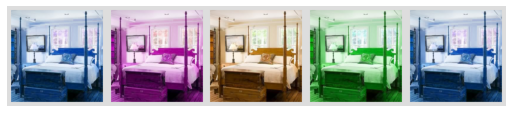

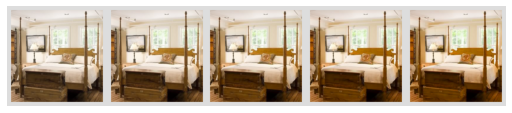

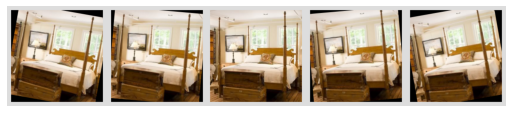

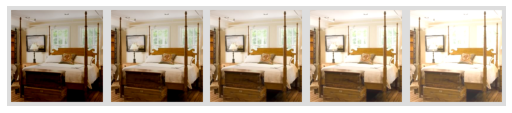

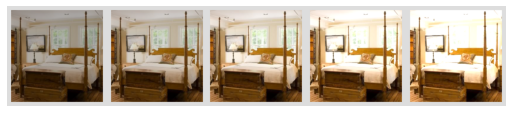

In [7]:
for img_id in (4,):
    print("image_id:", img_id, imagenet_namelist[targets[img_id]])
    for att_id in range(5):
        fig1 = plt.figure(constrained_layout=True,figsize=(7,2))
        for row in range(num_row):
            for col in range(num_col):
                idx = row*num_col + col
                adv_img = adv_img_list[att_id][idx][img_id]
                spec1 = gridspec.GridSpec(ncols=num_col, nrows=num_row, figure=fig1, wspace=0, hspace=0)

                adv_img = (np.moveaxis(adv_img, 0, 2)* 255).astype('uint8')
                adv_img = Image.fromarray(adv_img)
                adv_img = ImageOps.expand(adv_img, border=border, fill=bg_color)

                ax = fig1.add_subplot(spec1[row, col])
                ax.imshow(adv_img)
                ax.axis('off')
#         plt.savefig("")
        plt.show()
    break